In [351]:
# Dataset para Regresión Lineal - Vehicle Dataset:
# Disponible en: https://www.kaggle.com/nehalbirla/vehicle-dataset-fromcardekho
# Este dataset contiene información técnica y de mercado de automóviles.
# El objetivo es predecir el precio del automóvil en función de sus atributos.

# Antes de iniciar con el proceso, en el archivo las columnas se nombraron igual, ya que en algunas no coincidian mayuscula y minuscula

In [449]:
# Importar librerias necesarias

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import glob 


# Utilizar la función glob para leer los 4 archivos csv: car data, dar detail from dekho, car detail v3, car detail v4
file_pattern = "./*.csv"  # Todos los archivos inician por car, este es el patrón en el directorio actual
file_paths = glob.glob(file_pattern)

# Cargar datos de las fuentes
data_frames = [pd.read_csv(file) for file in file_paths]
data = pd.concat(data_frames)

print(data.shape)  # Esto imprimirá el número de filas y columnas cargados

(14828, 24)


In [450]:
# 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

# Visualizo los valores de cada columna
data.head(100)

,Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel,Seller_Type,Transmission,Owner,Model,...,Max_Power,Max Torque,Drivetrain,Length,Width,Height,Seats,Fuel Tank Capacity,Mileage,Torque
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,corolla altis,2012,5.85,18.61,72000,Petrol,Dealer,Manual,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,innova,2016,20.75,25.39,29000,Diesel,Dealer,Automatic,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,corolla altis,2017,17.00,18.64,8700,Petrol,Dealer,Manual,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,corolla altis,2013,7.05,18.61,45000,Petrol,Dealer,Manual,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [451]:
# Exploro la estructura y los datos 
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Length,Width,Height,Seats,Fuel Tank Capacity
count,14828.000000,1.482800e+04,301.000000,1.482800e+04,1995.000000,1995.000000,1995.000000,9902.000000,1946.000000
mean,2013.955692,7.338985e+05,7.628472,6.593197e+04,4280.860652,1767.991980,1591.735338,5.394466,52.002210
std,4.121330,1.195352e+06,8.644115,5.404873e+04,442.458507,135.265825,136.073956,0.934542,15.110198
min,1983.000000,1.000000e-01,0.320000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,2012.000000,2.500000e+05,1.200000,3.200000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,2015.000000,4.500000e+05,6.400000,6.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,2017.000000,7.150000e+05,9.900000,9.000000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,2022.000000,3.500000e+07,92.600000,2.360457e+06,5569.000000,2220.000000,1995.000000,14.000000,105.000000


In [452]:
# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

# Limpiar valores NaN

data = data.dropna(axis=1)

In [454]:
# Identificar valores iguales a cero para columnas numéricas

# Identificar las columnas numéricas
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Validar la cantidad de registros con cero en cada columna numérica
for column in numeric_columns:
    zero_count = (data[column] == 0).sum()
    print("Cantidad de registros con cero en", column, ":", zero_count)

# Podemos ver que valores en cero solo nos salio la columna kilometraje, pero es normal este valor en esta columna

Cantidad de registros con cero en Year : 0
Cantidad de registros con cero en Selling_Price : 0
Cantidad de registros con cero en Kms_Driven : 1


In [455]:
data

,Name,Year,Selling_Price,Kms_Driven,Fuel,Transmission,Owner
0,ritz,2014,3.35,27000,Petrol,Manual,0
1,sx4,2013,4.75,43000,Diesel,Manual,0
2,ciaz,2017,7.25,6900,Petrol,Manual,0
3,wagon r,2011,2.85,5200,Petrol,Manual,0
4,swift,2014,4.60,42450,Diesel,Manual,0
...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000.00,110000,Petrol,Manual,First Owner
8124,Hyundai Verna CRDi SX,2007,135000.00,119000,Diesel,Manual,Fourth & Above Owner
8125,Maruti Swift Dzire ZDi,2009,382000.00,120000,Diesel,Manual,First Owner
8126,Tata Indigo CR4,2013,290000.00,25000,Diesel,Manual,First Owner


In [456]:
# Asignar el titulo de la columna en español para faciliar el analisis 

nombres_en_espanol = {
    
    'Name': 'Nombre',
    'Year': 'Año',
    'Selling_Price': 'Precio_venta',
    'Kms_Driven': 'Kilometraje',
    'Fuel': 'Capacidad_del_tanque_de_combustible',
    'Transmission': 'Transmision',
    'Owner': 'Propietarios',
}

data.rename(columns=nombres_en_espanol, inplace=True)

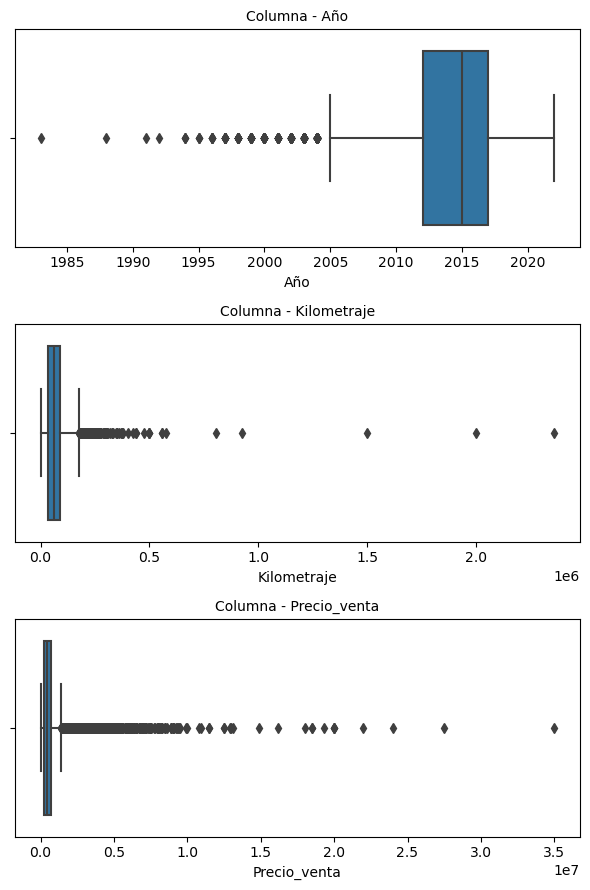

In [459]:
# Revisar datos atipicos mediante una grafica 

# Lista de columnas númericas
columnas_interes = ['Año', 'Kilometraje', 'Precio_venta']

# Tamaño del gráfico
plt.figure(figsize=(6, 3 * len(columnas_interes)))

# Generar gráficos de caja para cada columna
for i, columna in enumerate(columnas_interes, start=1):
    plt.subplot(len(columnas_interes), 1, i)
    sns.boxplot(x=data[columna])
    plt.title(f'Columna - {columna}', fontsize=10)

plt.tight_layout()
plt.show()


In [460]:
# Identificar los valores atipicos

# Definir los niveles mínimos y máximos para cada variable
variables = {
    'Año': (1990, 2020),
    'Kilometraje': (0, 100000),
    'Precio_venta': (500000, 100000000)
}

# Iterar sobre cada variable y calcular los datos atípicos
for variable, (nivel_minimo, nivel_maximo) in variables.items():
    total_atipicos = ((data[variable] < nivel_minimo) | (data[variable] > nivel_maximo)).sum()
    print(f"Datos atípicos de {variable} es: {total_atipicos}")


Datos atípicos de Año es: 239
Datos atípicos de Kilometraje es: 2530
Datos atípicos de Precio_venta es: 8086


In [461]:
# Filtrar los datos atípicos para las tres columnas

for variable, (nivel_minimo, nivel_maximo) in variables.items():
    data = data[(data[variable] < nivel_maximo) & (data[variable] > nivel_minimo)]

In [463]:
# Iterar sobre cada variable y calcular los datos atípicos nuevamente

for variable, (nivel_minimo, nivel_maximo) in variables.items():
    total_atipicos = ((data[variable] < nivel_minimo) | (data[variable] > nivel_maximo)).sum()
    print(f"Datos atípicos de {variable} es: {total_atipicos}")

Datos atípicos de Año es: 0
Datos atípicos de Kilometraje es: 0
Datos atípicos de Precio_venta es: 0


In [464]:
# Validar la estructura de los datos 

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5202 entries, 6 to 8117
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Nombre                               5202 non-null   object 
 1   Año                                  5202 non-null   int64  
 2   Precio_venta                         5202 non-null   float64
 3   Kilometraje                          5202 non-null   int64  
 4   Capacidad_del_tanque_de_combustible  5202 non-null   object 
 5   Transmision                          5202 non-null   object 
 6   Propietarios                         5202 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 325.1+ KB


In [465]:
# 3. Seleccionar las características más relevantes para entrenar el  modelo utilizando selección de características

#Variable dependiente
data['Precio_venta'].value_counts()
data['Precio_venta'].head(30)

6      550000.0
8      850000.0
12    1650000.0
19     550000.0
21     850000.0
25    1650000.0
26     585000.0
27    1195000.0
29    1964999.0
30    1425000.0
31     975000.0
33     930000.0
34     525000.0
35    1735000.0
36    1375000.0
38     900000.0
39    1300000.0
40    1400000.0
43    1550000.0
44    1250000.0
45     625000.0
46    1050000.0
47     560000.0
54     725000.0
56     750000.0
58     665000.0
62     675000.0
66     525000.0
71     570000.0
77     925000.0
Name: Precio_venta, dtype: float64

In [466]:
#  4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

# Train 75%, Y Test 25%

# Cargar los datos de train numericos sin los datos de la columna Precio_de_venta
X = data[['Año', 'Kilometraje']]

# Se cargan los datos de train con Los datos de La columna Precio_de_venta
Y = data["Precio_venta"] 

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [467]:
print(X_train)

       Año  Kilometraje
867   2018         5000
3094  2019         7032
2589  2016        86000
548   2015        69000
7513  2013        84000
...    ...          ...
7403  2016        67600
2817  2016        80000
764   2014        19868
891   2017        50000
1145  2017        25538

[3901 rows x 2 columns]


In [468]:
print(Y_train)

867      509999.0
3094     779000.0
2589     700000.0
548     2149000.0
7513     850000.0
          ...    
7403     750000.0
2817     650000.0
764     1800000.0
891     1300000.0
1145     625000.0
Name: Precio_venta, Length: 3901, dtype: float64


In [469]:
# 5. Entrenar el modelo configurando los diferentes hiperparámetros.

#modelo de regresión lineal
modelo = LinearRegression().fit(X_train, Y_train)

#Modelo de predicción
prediccion= modelo.predict(X_test)


In [470]:
print(Y_test)

1107    2490000.0
159      875000.0
357      570000.0
6971     600000.0
2836     650000.0
          ...    
7851     750000.0
132     5150000.0
1071    2250000.0
691      600000.0
5332     562000.0
Name: Precio_venta, Length: 1301, dtype: float64


In [471]:
print(prediccion)

[1050829.96970519 1428774.24666646 1080630.9846186  ...  857123.37276793
 1388884.64187369 1652591.69500017]


In [475]:
# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

# Métricas
metrics = {
    'Error Cuadrático Medio (MSE)': mean_squared_error,
    'Raíz del Error Cuadrático Medio (RMSE)': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'Error Absoluto Medio (MAE)': mean_absolute_error,
    'Coeficiente de Determinación (R²)': r2_score
}

# Calcular las métricas
metric_results = {metric_name: metric_func(Y_test, prediccion) for metric_name, metric_func in metrics.items()}

# Imprimir métricas
print("Métricas del modelo de regresión lineal:")
for metric_name, metric_value in metric_results.items():
    print(f"{metric_name}: {metric_value}")
    

Métricas del modelo de regresión lineal:
Error Cuadrático Medio (MSE): 2798972933349.548
Raíz del Error Cuadrático Medio (RMSE): 1673013.130058921
Error Absoluto Medio (MAE): 862221.708308277
Coeficiente de Determinación (R²): 0.016597700834860785


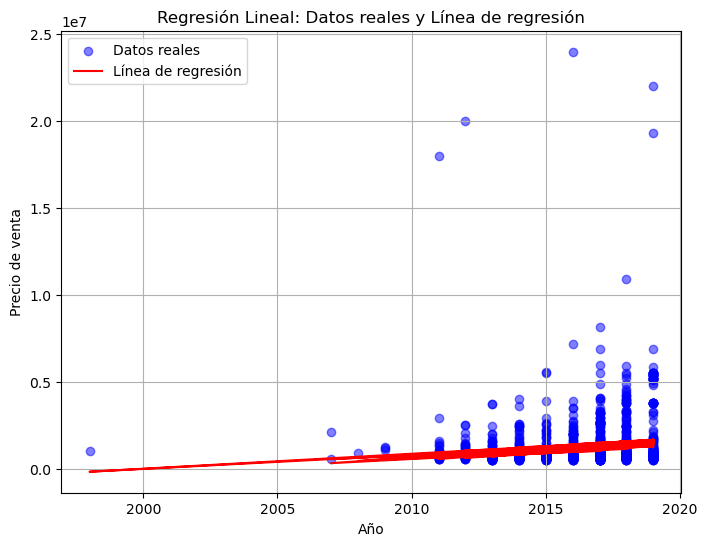

In [476]:
# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

# Gráfico de la línea de regresión junto con los datos reales en el conjunto de prueba

plt.figure(figsize=(8, 6))

# Graficar los datos reales
plt.scatter(X_test['Año'], Y_test, color='blue', label='Datos reales', alpha=0.5)

# Graficar la línea de regresión
plt.plot(X_test['Año'], prediccion, color='red', label='Línea de regresión')

plt.xlabel('Año')
plt.ylabel('Precio de venta')
plt.title('Regresión Lineal: Datos reales y Línea de regresión')
plt.legend()
plt.grid(True)
plt.show()


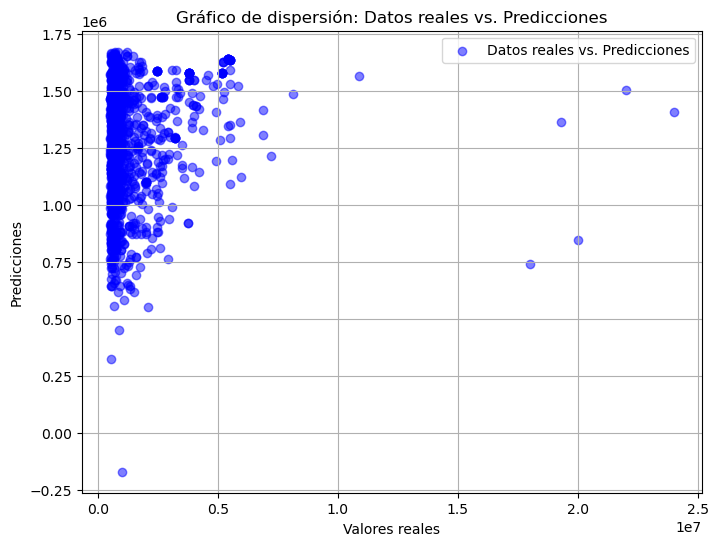

In [477]:
# Gráfico de dispersión de datos reales vs. predicciones

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, prediccion, color='blue', label='Datos reales vs. Predicciones', alpha=0.5)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de dispersión: Datos reales vs. Predicciones')
plt.legend()
plt.grid(True)
plt.show()


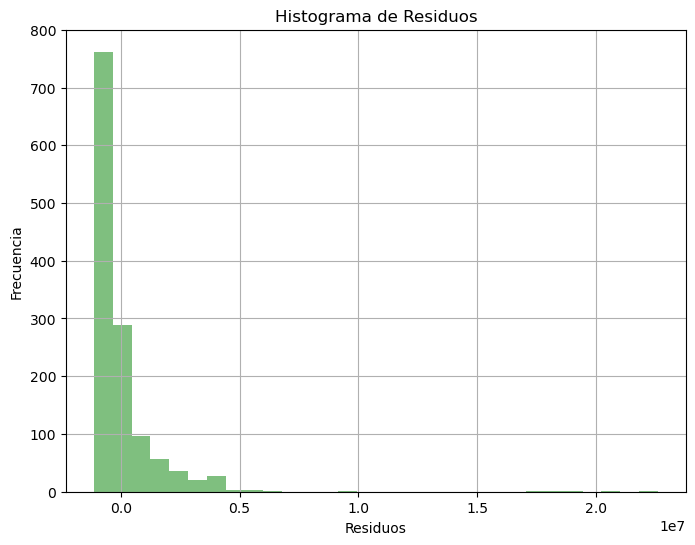

In [478]:
# Histograma de los residuos

residuos = Y_test - prediccion
plt.figure(figsize=(8, 6))
plt.hist(residuos, bins=30, color='green', alpha=0.5)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.grid(True)
plt.show()


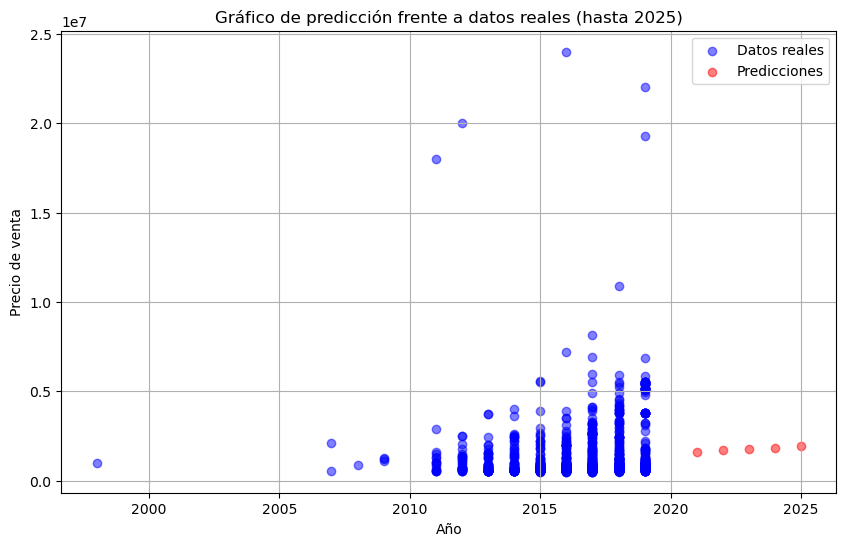

In [479]:
# Predicciones para los años desde 2021 hasta 2025

nuevos_años = pd.DataFrame({'Año': range(2021, 2026), 'Kilometraje': [X_train['Kilometraje'].mean()] * 5})
predicciones_2021_2025 = modelo.predict(nuevos_años)

plt.figure(figsize=(10, 6))

# Gráfico de dispersión de datos reales
plt.scatter(X_test['Año'], Y_test, color='blue', label='Datos reales', alpha=0.5)

# Gráfico de dispersión de predicciones
plt.scatter(nuevos_años['Año'], predicciones_2021_2025, color='red', label='Predicciones', alpha=0.5)

plt.xlabel('Año')
plt.ylabel('Precio de venta')
plt.title('Gráfico de predicción frente a datos reales (hasta 2025)')
plt.legend()
plt.grid(True)
plt.show()